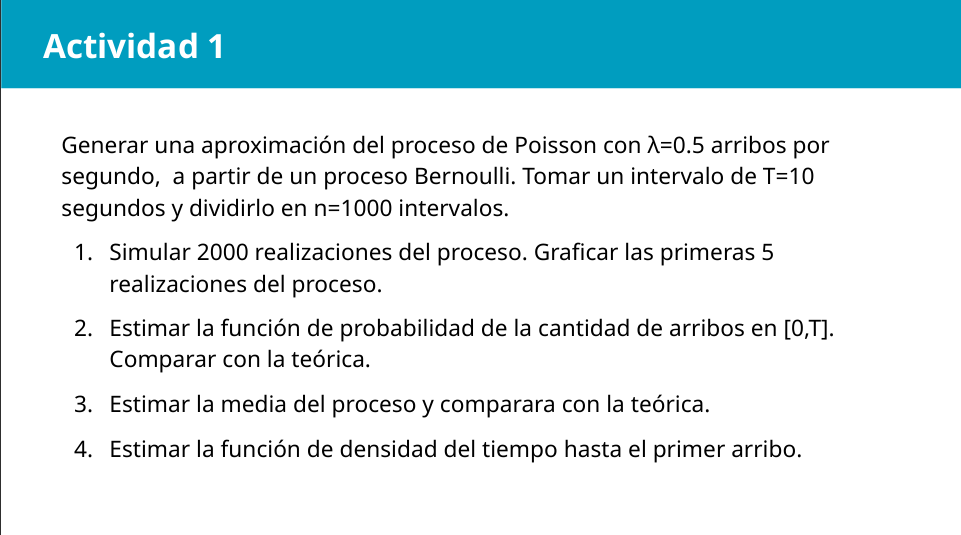

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

l = 0.5 #lambda
T = 10 #intervalo de 10s
n = 1000 #cantidad de intervalos
R = 2000 #cantidad de realizaciones

delta = T/n #largo de cada intervalito
p = l * delta #probabilidad de éxito en cada intervalito
X = np.random.binomial(n = 1, p = p, size = (R, n)) #realizaciones de la bernoulli

P = np.cumsum(X, axis = 1) #estos serían los arribos en el PP (partido peronista)
print(P)

[[0 0 0 ... 7 7 7]
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 6 6 6]
 ...
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 7 7 7]
 [0 0 1 ... 8 8 8]]


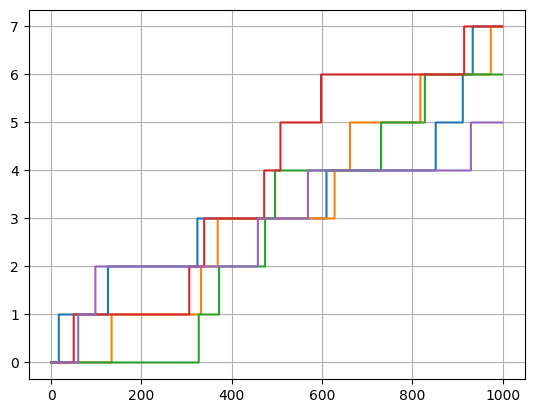

In [20]:
t = np.arange(n) #eje de tiempos
for i in range(5):
    plt.step(t, P[i])

plt.grid(True)
plt.show()

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]


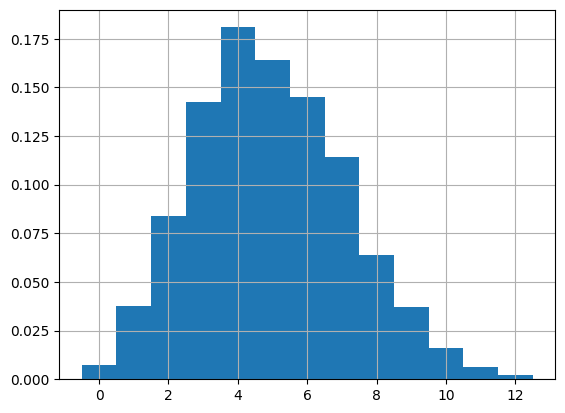

In [ ]:
Arr = np.sum(X, axis = 1) #pensar que el axis es lo que achancha
#vector columna de R (2000) filas. Este vector tiene la cantidad de arribos que hubo en cada realización
#si no me equivoco equivale a agarrar la última columna de P
bins = np.arange(np.max(Arr)) - 0.5 #vector de bins. Esto genera un bin centrado en cada entero posible. 
#Como las realizaciones de Arr son todas anteras, esto tiene sentido
plt.hist(Arr, bins = bins, density = True)

#la distribución posta sería una Poisson de parámetro T*lamda

plt.grid(True)
plt.show()


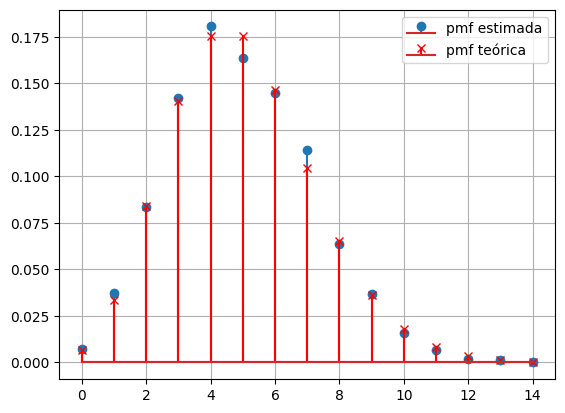

In [33]:
#Más correcto (por ser ortodoxo) sería hacer lo siguiente
prob = np.bincount(Arr) #este array es tal que en prob[i] hay un entero que representa la cantidad de veces que aparece el número i en el array Arr
#o también: cuenta las ocurrencias de cada entero

PMF = (1/R) * prob #así estimo la probabilidad
eje = np.arange(len(PMF))
plt.stem(eje, PMF, label = 'pmf estimada')

#para comparar, estimo con la poisson posta:
from scipy.stats import poisson

param = l * T

pmf_teo = poisson.pmf(k = eje, mu = param)

plt.stem(eje, pmf_teo, linefmt = 'r', markerfmt = 'rx', label = 'pmf teórica')

plt.legend()
plt.grid(True)
plt.show()

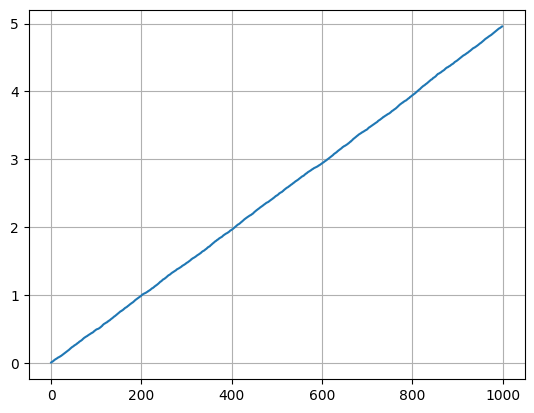

In [34]:
media = np.mean(P, axis = 0)

plt.plot(t, media)

plt.grid(True)
plt.show()

In [35]:
#ahora sí corresponde usar histograma
#quiero estimar el tiempo hasta el primer arribo en cada una de mis R realizaciones

#bue, le pregunté al chat y es un re quilombo. Hay q tener cuidado con las realizaciones en donde no hay arribos. ¿Terminar dsp?

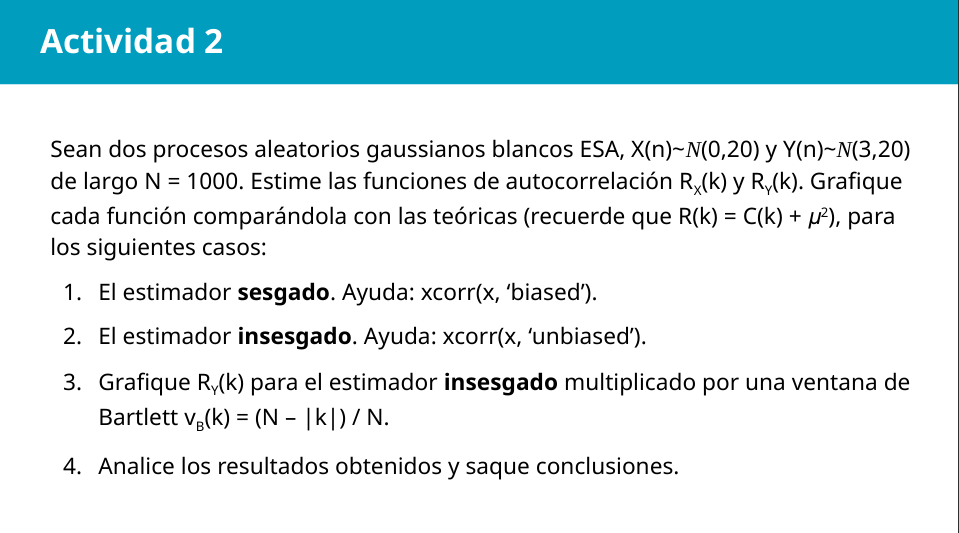

### Ver comentarios sobre los estimadores de la autocorrelación en rnote.

Antes de seguir, voy a entender mejor que hace la función np.correlate

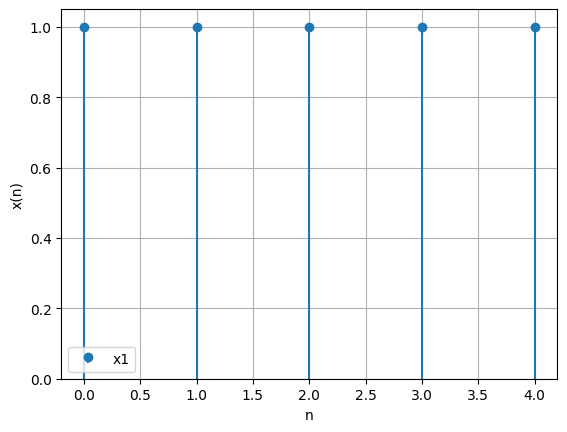

(9,)
[1. 2. 3. 4. 5. 4. 3. 2. 1.]


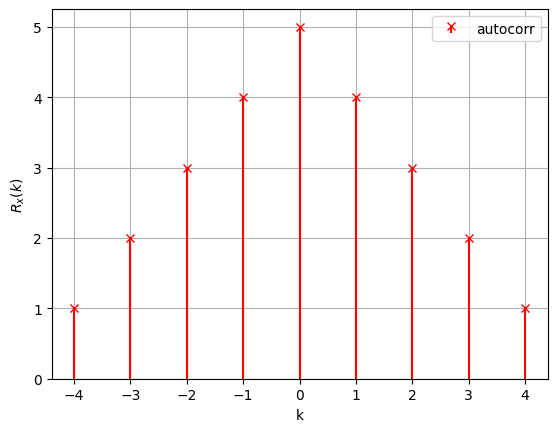

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = 5

x1 = np.ones(L)

plt.stem(x1, label = 'x1', basefmt = 'none')

plt.ylim(0)
plt.ylabel('x(n)')

plt.xlabel('n')

plt.legend()
plt.grid(True)
plt.show()

#Calculo al autocrr
y = np.correlate(x1, x1, 'full') 
print(y.shape)
print(y) #len(y) = 2L - 1

k = np.arange(start = -(L - 1), stop = L)

#y = y[L - 1:] #me quedo con los valores de k >= 0. y[L - 1] corresponde a k = 0
#k = k[L - 1:]

plt.stem(k, y, linefmt = 'r-', markerfmt = 'rx', basefmt = 'none', label = 'autocorr')

plt.ylim(0)
plt.ylabel('$R_x(k)$')

plt.xlabel('k')

plt.legend()
plt.grid(True)

plt.show()



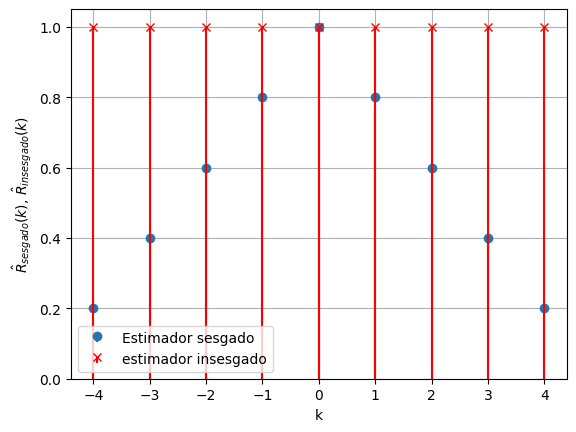

In [3]:
R_sesgado = (1/L) * y

denominador = L - np.abs(k)
R_insesgado = y / denominador

plt.stem(k, R_sesgado, basefmt='none', label = 'Estimador sesgado')

plt.stem(k, R_insesgado, linefmt = 'r-', markerfmt = 'rx', basefmt='none', label = 'estimador insesgado')

plt.ylim(0)
plt.ylabel(r'$\hat{R}_{sesgado}(k)$, $\hat{R}_{insesgado}(k)$')

plt.xlabel('k')

plt.legend()
plt.grid(True)
plt.show()

In [13]:

N = 1000 #largo de realizaciones
mu_x = 0
sigma_x, sigma_y = 20, 20
mu_y = 3
X = np.sqrt(sigma_x) * np.random.randn(N) + mu_x
Y = np.sqrt(sigma_y) * np.random.randn(N) + mu_y



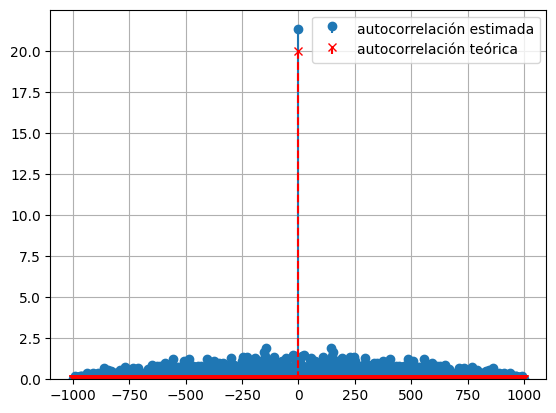

In [16]:
#función de autocorr de X
Rx_sesgada = (1/N) * np.correlate(X, X, mode = 'full')
#ojo con esta función, no es exactamente la autocorrelación
tau = np.arange(len(Rx_sesgada)) - (N - 1) #equivale a np.arange(start = -(N - 1), stop = N)
plt.stem(tau, Rx_sesgada, basefmt='none', label = 'autocorrelación estimada')

#Calculo la autocorrelación real
Rx = mu_x ** 2 *np.ones(tau.shape)
Rx[tau == 0] = sigma_x
plt.ylim(0)

plt.stem(tau, Rx, basefmt='none', linefmt = 'r--', markerfmt = 'rx',label = 'autocorrelación teórica')

plt.legend()
plt.grid(True)
plt.show()

[9. 9. 9. ... 9. 9. 9.]


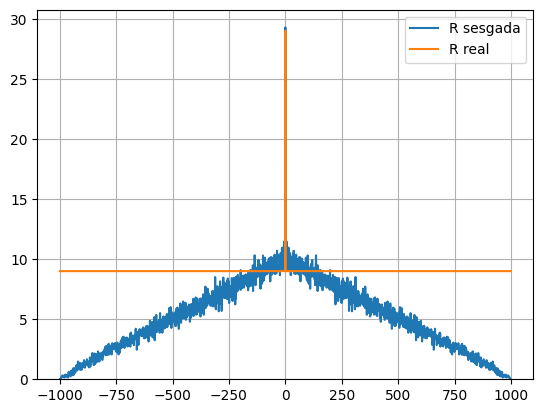

In [17]:
Ry_sesgada =  (1/N) * np.correlate(Y, Y, mode = 'full')

plt.plot(tau, Ry_sesgada, label = 'R sesgada')



Ry = mu_y ** 2 * np.ones(tau.shape)
Ry[tau == 0] = sigma_y + mu_y**2
print(Ry)
plt.plot(tau, Ry, label = 'R real')

plt.ylim(0)

plt.legend()
plt.grid(True)
plt.show()


### Conclusiones

Estos fueron los estimadores sesgados. Tienen el problema de que en 

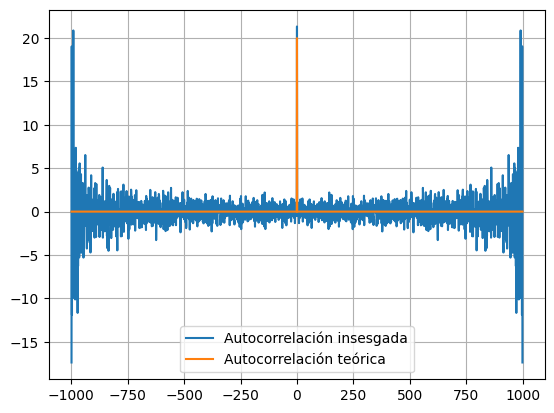

In [19]:
denominador = N - np.abs(tau)

Rx_insesgada = np.correlate(X, X, mode = 'full') / denominador

plt.plot(tau, Rx_insesgada, label = 'Autocorrelación insesgada')

plt.plot(tau, Rx, label = 'Autocorrelación teórica')

plt.legend()
plt.grid(True)
plt.show()

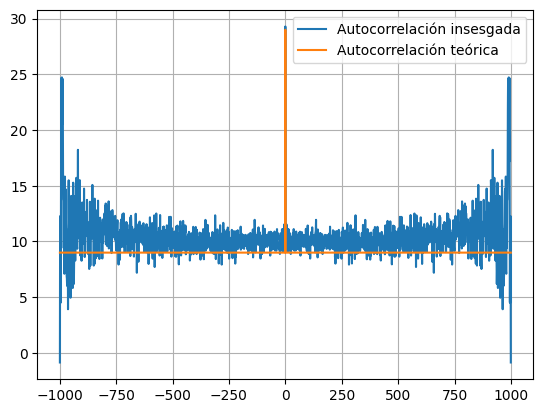

In [20]:
Ry_insesgada = np.correlate(Y, Y, mode = 'full') / denominador


plt.plot(tau, Ry_insesgada, label = 'Autocorrelación insesgada')

plt.plot(tau, Ry, label = 'Autocorrelación teórica')

plt.legend()
plt.grid(True)
plt.show()


Si multiplico la insesgada por la ventana vuelvo a obtener la sesgada.
Short the ball

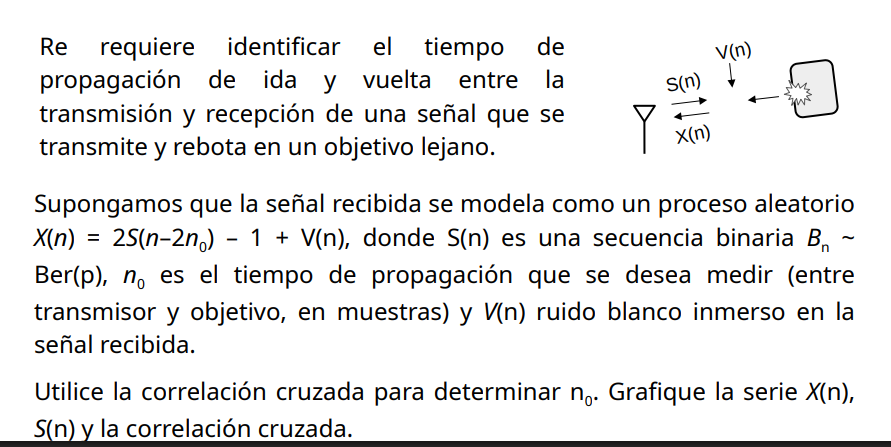

Voy a cambiar un poco la definición de X:

$
X(n) = S(n - 2 \cdot n_0) + N(n)
$

In [21]:
n0 = 10
#Acá defino n0, pero es justamente lo que no sé y quiero estimar

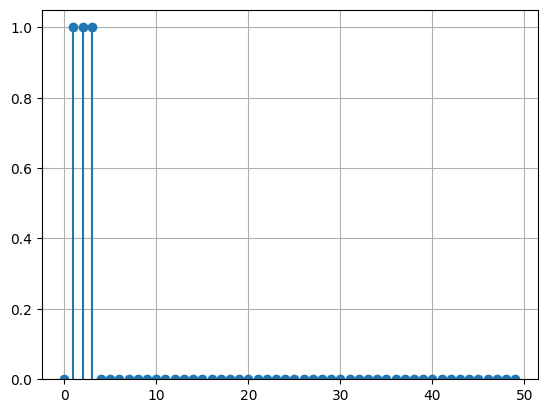

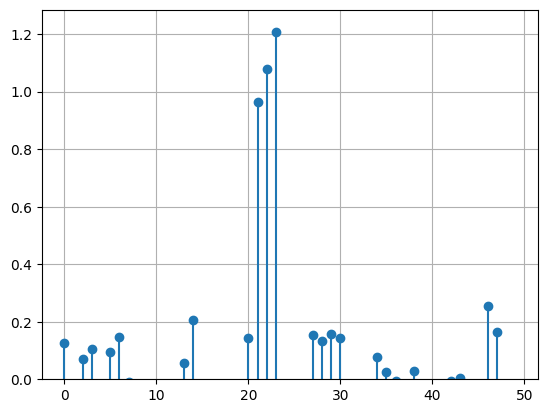

In [23]:
L = 50 #largo de X(n) y S(n)
S = np.random.binomial(n = 1, p = 0.5, size = 5)

ceros = np.zeros(L - len(S))

S = np.concatenate((S, ceros)) #le agrego 45 ceros para que mida 50.as_integer_ratio

X = np.zeros(L)
for i in range(2*n0, L):
    X[i] = S[i - 2*n0]

N = np.sqrt(0.02) * np.random.randn(L)
X = X + N

plt.stem(S, basefmt= 'none')
plt.ylim(0)
plt.grid(True)
plt.show()

plt.stem(X, basefmt= 'none')
plt.ylim(0)
plt.grid(True)
plt.show()

En realidad yo mediría $S(n)$ y $X(n)$ sin conocer $n_0$

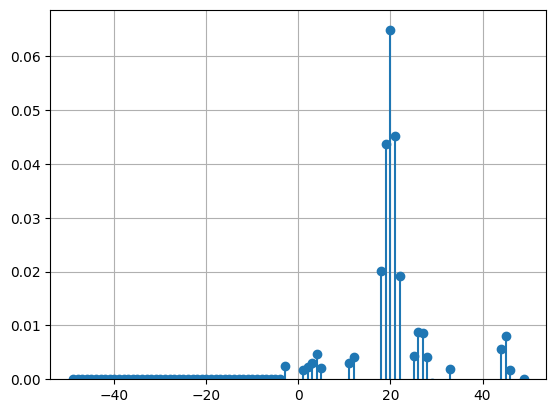

In [32]:
RSX = (1/L) * np.correlate(X, S, mode = 'full')
#nota: el primer vector es el que se desplaza n + k
tau = np.arange(start = -(L - 1), stop = L)

plt.stem(tau, RSX, basefmt = 'none')

#plt.xlim(0)

plt.ylim(0)

plt.grid(True)
plt.show()

$
R_{SX}(k) = \sum_0^{L - k -1} S(n) \cdot X(n + k) = \sum_0^{L - k -1} S(n) \cdot [S(n - 2n_0 + k) + N(n)]
$

Si el desplazamiento k es tal que las partes donde $X(n)$ y $S(n)$ no son nulas se solapan, la autocorrelación se maximiza

O sea, donde $R_{SX}$ se maximiza, k vale $2 \cdot n_0$

OJO: la correlación cruzada NO es simétrica

(50,)


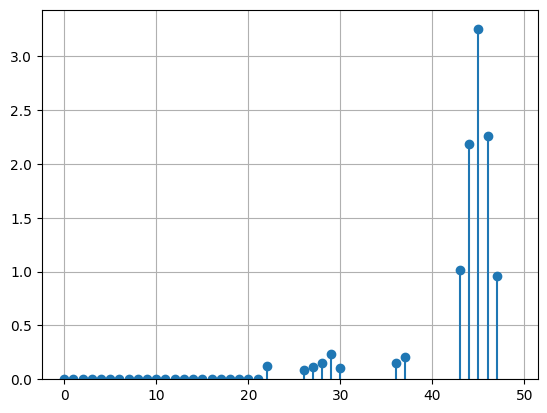

In [30]:
RSX = np.correlate(X, S, mode = 'same')

print(RSX.shape)

plt.stem(RSX, basefmt = 'none')


plt.ylim(0)

plt.grid(True)
plt.show()

Conclusiones:
$
R_{XY}(k) = \sum_0^{L - k - 1} X(n) \cdot Y (n + k)
$
1) Si la correlación cruzada es grande y positiva, las señales $X(n)$ e $Y(n + k)$ se parecen
2) Si la correlación es grande y negativa, las señales son parecidas pero opuestas
3) Si es 0, no tiene nada que ver una con la otra